# Порівняння методів класифікації

## 1. Імпорт необхідних пакетів  

In [1]:
import sklearn as sk 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## 2. Імпорт набору даних для подальшої роботи

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## 3. Розподіл набору даних, щоб відповіді були окремо від основних даних

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##  4.	Перевірка на наявність пропущених даних 

In [4]:
dataset.info()
dataset.isnull().sum()
dataset.fillna(dataset.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## 5. Розподіл набору даних на тестову та тренувальну вибірку даних 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [6]:
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [7]:
print(X_train)
print(X_test)

[[    55 125000]
 [    35  55000]
 [    49  28000]
 [    28  44000]
 [    53  34000]
 [    31  58000]
 [    30 116000]
 [    48  30000]
 [    35  50000]
 [    19  85000]
 [    47 105000]
 [    19  26000]
 [    51 134000]
 [    42  75000]
 [    28  59000]
 [    47  25000]
 [    42  80000]
 [    37  93000]
 [    45 131000]
 [    26 118000]
 [    60 102000]
 [    27  84000]
 [    19  19000]
 [    24  84000]
 [    37  33000]
 [    40  59000]
 [    49  89000]
 [    33  60000]
 [    28  85000]
 [    30  87000]
 [    39  59000]
 [    48  90000]
 [    31  34000]
 [    41  87000]
 [    30  79000]
 [    31  66000]
 [    35  27000]
 [    47  51000]
 [    47 144000]
 [    47  30000]
 [    39  96000]
 [    38  61000]
 [    35  97000]
 [    25  87000]
 [    21  88000]
 [    60  83000]
 [    38  50000]
 [    24  23000]
 [    42  64000]
 [    26  30000]
 [    58 144000]
 [    38  59000]
 [    60  34000]
 [    46  96000]
 [    37  74000]
 [    19  70000]
 [    37  62000]
 [    60 108000]
 [    40  6000

In [8]:
print(y_train)
print(y_test)

[1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1]
[0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1]


## 6.	Масштабування даних 

### Метод StandardScaler

##### Метод StandartScaling хоч і не робить розподіл нормальним в строгому сенсі слова, але в якійсь мірі захищає від викидів.

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 1.62866988  1.69584124]
 [-0.2592782  -0.41980458]
 [ 1.06228545 -1.23583939]
 [-0.92006003 -0.7522632 ]
 [ 1.43987507 -1.05449832]
 [-0.63686782 -0.32913404]
 [-0.73126522  1.42382963]
 [ 0.96788805 -1.17539237]
 [-0.2592782  -0.57092213]
 [-1.76963667  0.48690077]
 [ 0.87349065  1.09137101]
 [-1.76963667 -1.29628641]
 [ 1.25108026  1.96785284]
 [ 0.40150363  0.18466566]
 [-0.92006003 -0.29891053]
 [ 0.87349065 -1.32650993]
 [ 0.40150363  0.33578321]
 [-0.0704834   0.72868887]
 [ 0.68469584  1.87718231]
 [-1.10885484  1.48427666]
 [ 2.1006569   1.00070047]
 [-1.01445744  0.45667726]
 [-1.76963667 -1.507851  ]
 [-1.29764965  0.45667726]
 [-0.0704834  -1.08472183]
 [ 0.21270882 -0.29891053]
 [ 1.06228545  0.60779482]
 [-0.44807301 -0.26868702]
 [-0.92006003  0.48690077]
 [-0.73126522  0.5473478 ]
 [ 0.11831141 -0.29891053]
 [ 0.96788805  0.63801833]
 [-0.63686782 -1.05449832]
 [ 0.30710622  0.5473478 ]
 [-0.73126522  0.3055597 ]
 [-0.63686782 -0.08734595]
 [-0.2592782  -1.2660629 ]
 

In [11]:
print(X_test)

[[-0.1648808  -0.57092213]
 [-0.2592782  -0.93360427]
 [-0.54247042  1.45405314]
 [ 0.40150363 -0.4802516 ]
 [ 1.25108026  2.33053498]
 [-0.0704834   0.0335481 ]
 [-0.0704834   0.09399512]
 [-0.2592782  -0.11756946]
 [-0.82566263  0.42645375]
 [ 0.30710622 -0.51047511]
 [-0.44807301  2.42120552]
 [ 1.06228545 -0.9940513 ]
 [ 1.43987507  0.09399512]
 [ 0.21270882 -0.35935755]
 [-1.10885484 -1.62874504]
 [ 0.21270882 -0.35935755]
 [ 0.77909324 -1.23583939]
 [ 0.77909324  1.45405314]
 [-0.44807301  1.3331591 ]
 [ 1.62866988 -0.90338076]
 [-0.35367561  1.39360612]
 [-0.82566263  0.42645375]
 [-1.01445744  0.8193594 ]
 [ 1.72306728  1.93762933]
 [-0.44807301  0.00332459]
 [-0.1648808   2.27008796]
 [-1.39204705 -0.17801648]
 [-1.01445744 -0.35935755]
 [ 0.11831141  1.12159452]
 [-1.48644446  0.36600673]
 [ 1.53427248 -1.29628641]
 [-0.2592782  -0.29891053]
 [ 1.91186209 -1.38695695]
 [-1.01445744 -1.56829802]
 [-0.44807301 -1.23583939]
 [-0.1648808  -0.45002809]
 [-0.0704834   0.24511268]
 

## 7. Візуалізація результатів

### Naive Bayes 

#### Навчання моделей Naive Bayes на навчальному наборі даних:

In [12]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Прогнозування результатів на тестовому наборі даних: 

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матриця відповідей:")
print(conf_matrix)
print('Оцінка точності на тестовому наборі:')                             
print("{:.0%}".format(accuracy_score(y_test,y_pred)))
Accuracy_NB = accuracy_score(y_test,y_pred)
print(Accuracy_NB)

Матриця відповідей:
[[59  5]
 [ 6 30]]
Оцінка точності на тестовому наборі:
89%
0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


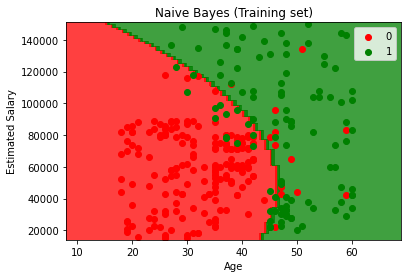

In [16]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
X_set, Y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step =1 ),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


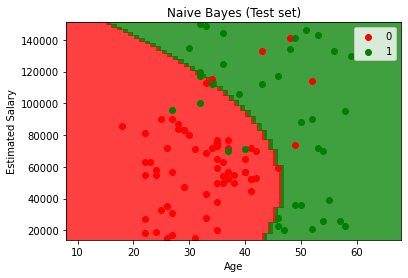

In [17]:
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Random Forest

#### Навчання моделей Random Forest на навчальному наборі даних:

In [18]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

#### Прогнозування результатів на тестовому наборі даних: 

In [19]:
y_pred = rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матриця відповідей:")
print(conf_matrix)
print('Оцінка точності на тестовому наборі:')                             
print("{:.0%}".format(accuracy_score(y_test,y_pred)))
Accuracy_RF = accuracy_score(y_test,y_pred)
print(Accuracy_RF)

Матриця відповідей:
[[60  4]
 [ 5 31]]
Оцінка точності на тестовому наборі:
91%
0.91


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


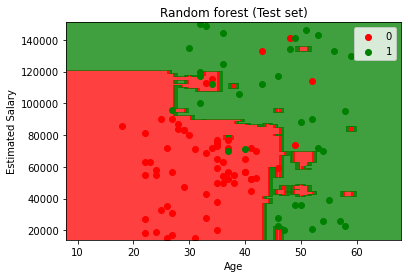

In [21]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, rf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


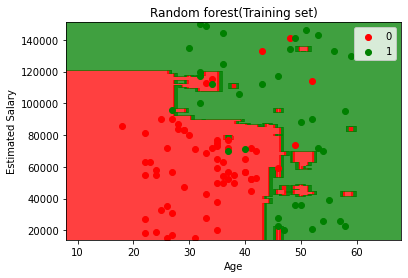

In [22]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, rf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forest(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

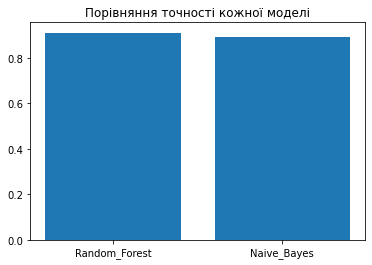

In [24]:
Accuracy = [Accuracy_RF, Accuracy_NB]
Methods = ['Random_Forest', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Порівняння точності кожної моделі')
plt.show()
